In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Take a look at the 3 datasets
df = pd.read_excel("hotdog-contest-winners.xlsm")
df.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


In [3]:
df2 = pd.read_excel("hotdog-places.xlsm")
df2.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [2]:
df3 = pd.read_excel("obama-approval-ratings.xls")
df3.head()

,Issue,Approve,Disapprove,None
0,Race Relations,52,38,10
1,Education,49,40,11
2,Terrorism,48,45,7
3,Energy Policy,47,42,11
4,Foreign Affairs,44,48,8


***Bar Chart***

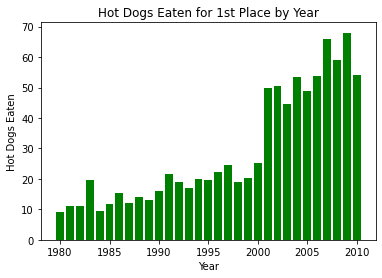

In [13]:
# Use hotdog-contest-winner dataset to produce a bar chart
plt.bar(df.Year, df["Dogs eaten"], color='green')
plt.ylabel("Hot Dogs Eaten")
plt.xlabel("Year")
plt.title("Hot Dogs Eaten for 1st Place by Year")
plt.show()

***Stacked Bar Chart***

In [3]:
# Set Issue as the Index 
df3byIssue = df3.set_index('Issue')
df3byIssue

,Approve,Disapprove,None
Issue,,,
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3


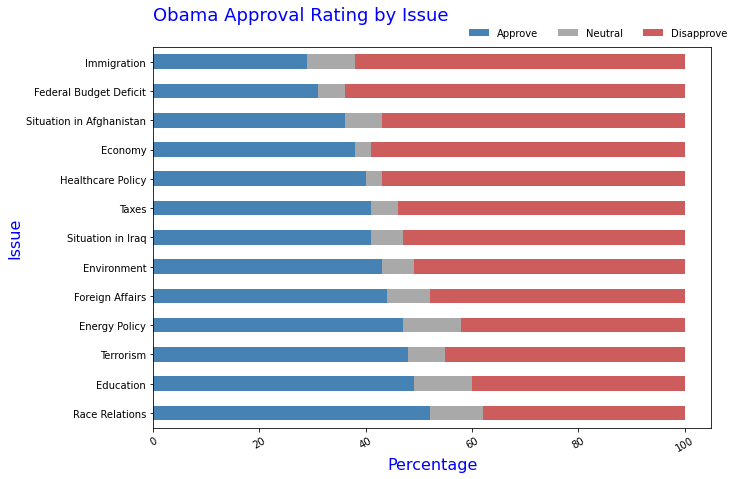

In [11]:
# Use obama-approval-rating dataset to produce a stacked bar chart

# Create colors variable to use my selected colors
colors = ['steelblue', 'darkgray', 'indianred']

# Create labels for legend
labels = ['Approve', 'Neutral', 'Disapprove']

# Create a stacked bar, but reverse the order 
df3byIssue[['Approve', 'None', 'Disapprove']].plot.barh(stacked=True, color=colors, figsize=(10,7))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Obama Approval Rating by Issue\n", size=18, color="blue", loc='left')
plt.xlabel("Percentage", size=16, color="blue")
plt.ylabel("Issue", size=16, color="blue")
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)

***Pie Chart***

In [22]:
# Count the amount of wins by country to create data for pie chart
df_wins = df["Country"].value_counts()
df_wins

United States    20
Japan             9
Mexico            1
Germany           1
Name: Country, dtype: int64

In [20]:
# Create labels using list of countries
countries = ['United States', 'Japan', 'Germany', 'Mexico']

# Write a function to translate the data into a percentage
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

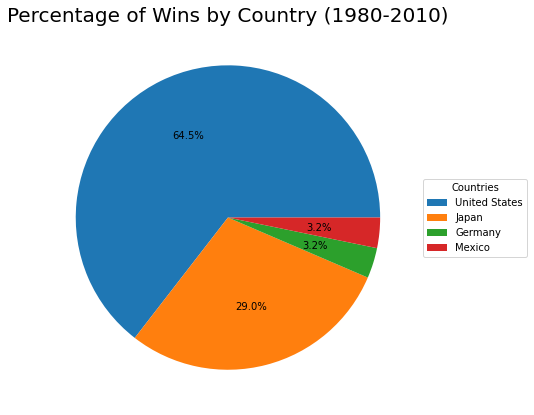

In [35]:
# Create pie chart
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(df_wins, autopct=lambda pct: func(pct, df_wins),
                                  textprops=dict(color="black"))

ax.legend(wedges, countries,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10)
ax.set_title("Percentage of Wins by Country (1980-2010)", size=20)
plt.show()

***Donut Chart***

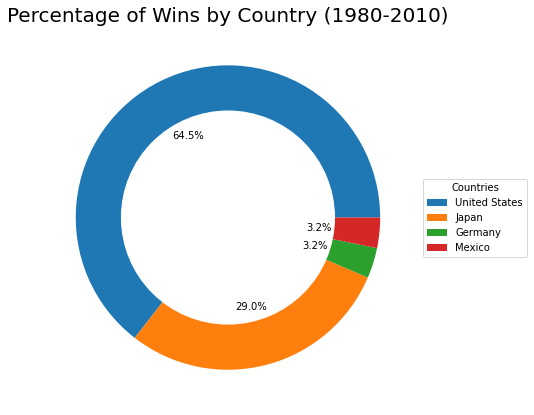

In [36]:
# Start with my pie chart, then add a circle in the middle
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(df_wins, autopct=lambda pct: func(pct, df_wins),
                                  textprops=dict(color="black"))

ax.legend(wedges, countries,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10)
ax.set_title("Percentage of Wins by Country (1980-2010)", size=20)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
  
# show plot
plt.show()